In [33]:
import matplotlib.pyplot as plt
import random as rm
import itertools as it

def simulate_100() -> list[float]:
    price_seq = [100.0]
    
    for i in range(99):
        new_item = price_seq[i] * (1 + rm.uniform(-0.05, 0.05))
        price_seq.append(new_item)
    
    return price_seq


def moving_avg(prices: list[float]) -> list[float]:
    pnl = []

    for i in range(len(prices) - 21):
        short_prev = sum(prices[i+15:i+20]) / 5
        long_prev = sum(prices[i:i+20]) / 20

        short_now = sum(prices[i+16:i+21]) / 5
        long_now = sum(prices[i+1:i+21]) / 20

        # Buy signal: short crosses above long
        if short_prev <= long_prev and short_now > long_now:
            pnl.append(prices[i+21] - prices[i+20])  # Buy low, sell high

        # Sell signal: short crosses below long
        elif short_prev >= long_prev and short_now < long_now:
            pnl.append(prices[i+20] - prices[i+21])  # Sell high, buy low

        else:
            pnl.append(0.0)

    return pnl



def momentum_strategy(prices: list[float]) -> list[float]: # 1-day signal momentum
    lst = prices
    pnl = []
    
    for i in range(1, len(lst)-1):
        if (lst[i] - lst[i-1]) > 0:
            change = lst[i+1] - lst[i]
            pnl.append(change)
        
        elif (lst[i] - lst[i-1]) < 0:
            change = lst[i] - lst[i+1]
            pnl.append(change)
        
        else:
            pnl.append(0.0)
    
    return pnl


def momentum_strategy2(prices: list[float]) -> list[float]: # 2-day signal momentum
    lst = prices
    pnl = []
    
    for i in range(2, len(lst) - 1):
        if (lst[i] - lst[i-1]) > 0 and (lst[i-1] - lst[i-2]) > 0:
            change = lst[i+1] - lst[i]
            pnl.append(change)
        
        else:
            change = lst[i] - lst[i+1]
            pnl.append(change)
    
    return pnl


def momentum_strategy3(prices: list[float]) -> list[float]: # 3-day signal momentum
    lst = prices
    pnl = []
    
    for i in range(3, len(lst) - 1):
        if (lst[i] - lst[i-1]) > 0 and (lst[i-1] - lst[i-2]) > 0 and (lst[i-2] - lst[i-3]) > 0:
            change = lst[i+1] - lst[i]
            pnl.append(change)
        
        else:
            change = lst[i] - lst[i+1]
            pnl.append(change)
    
    return pnl

def coin_flip(prices: list[float]) -> list[float]:
    price_lst = prices
    net_lst = []
    
    for i in range(99):
        action = rm.choice(["buy", "sell"])
        if action == "buy":
            net_lst.append(price_lst[i+1] - price_lst[i])
        else:
            net_lst.append(price_lst[i] - price_lst[i+1])
    
    return net_lst

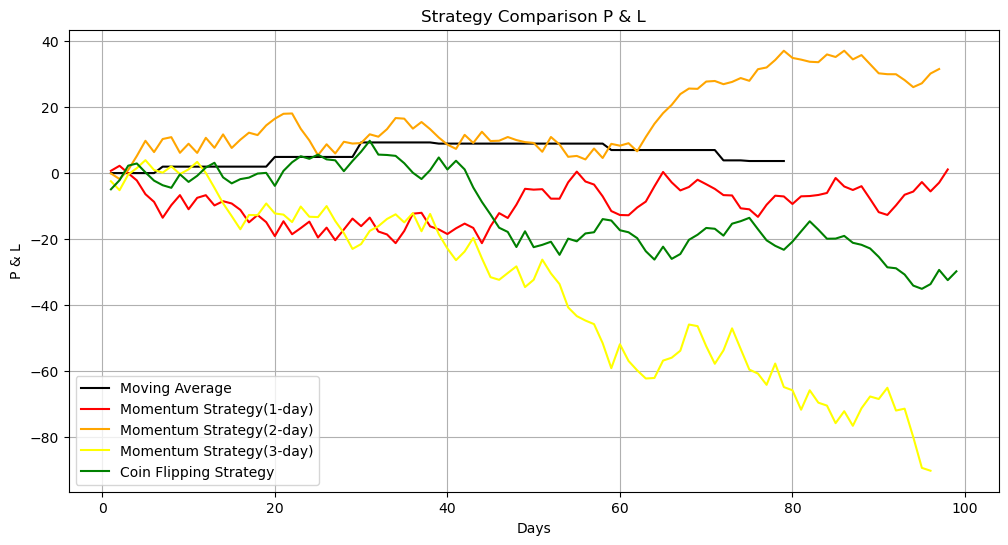

In [34]:
plt.figure(figsize=(12, 6))

pnl1 = moving_avg(simulate_100())
pnl2 = momentum_strategy(simulate_100())
pnl3 = momentum_strategy2(simulate_100())
pnl4 = momentum_strategy3(simulate_100())
pnl5 = coin_flip(simulate_100())


cumulative_pnl1 = list(it.accumulate(pnl1))
cumulative_pnl2 = list(it.accumulate(pnl2))
cumulative_pnl3 = list(it.accumulate(pnl3))
cumulative_pnl4 = list(it.accumulate(pnl4))
cumulative_pnl5 = list(it.accumulate(pnl5))



plt.plot(range(1,len(cumulative_pnl1) + 1), cumulative_pnl1, label = "Moving Average", color = 'black')
plt.plot(range(1,len(cumulative_pnl2) + 1), cumulative_pnl2, label = "Momentum Strategy(1-day)", color = 'red' )
plt.plot(range(1,len(cumulative_pnl3) + 1), cumulative_pnl3, label = "Momentum Strategy(2-day)", color = 'orange')
plt.plot(range(1,len(cumulative_pnl4) + 1), cumulative_pnl4, label = "Momentum Strategy(3-day)", color = 'yellow')
plt.plot(range(1,len(cumulative_pnl5) + 1), cumulative_pnl5, label = "Coin Flipping Strategy", color = 'green')



plt.xlabel("Days")
plt.ylabel("P & L")
plt.title("Strategy Comparison P & L")
plt.legend()
plt.grid()
plt.show()

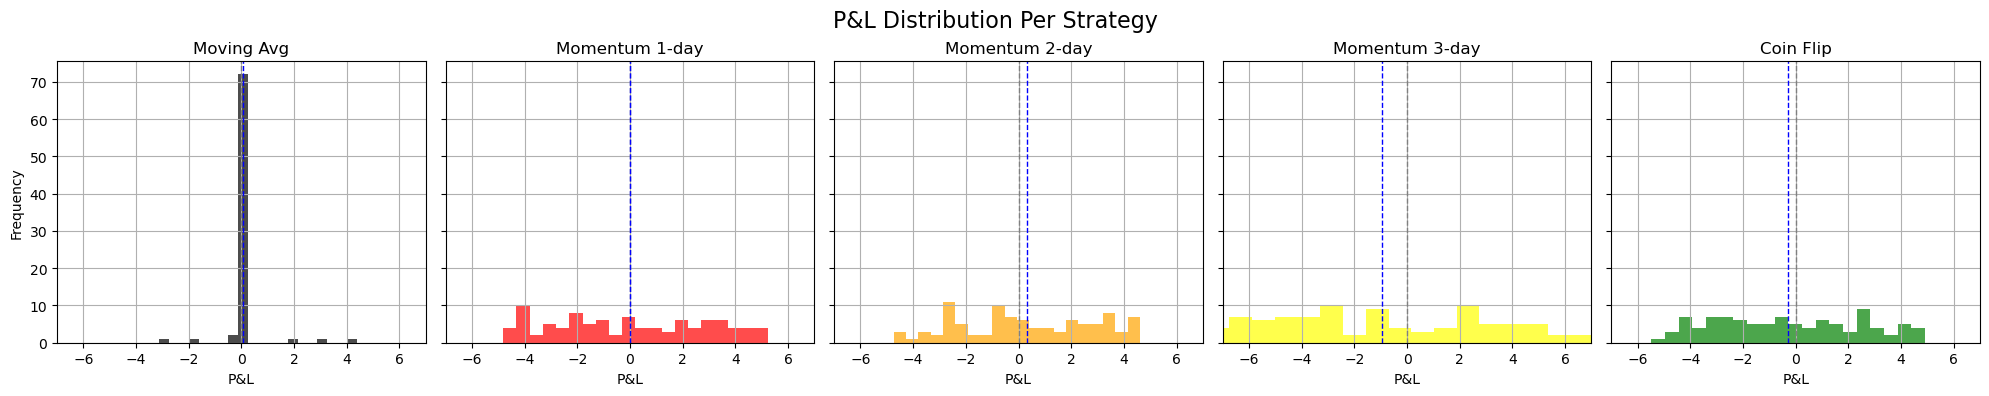

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pnl1–pnl5 are already defined:
pnl_data = [pnl1, pnl2, pnl3, pnl4, pnl5]
strategy_names = [
    "Moving Avg", 
    "Momentum 1-day", 
    "Momentum 2-day", 
    "Momentum 3-day", 
    "Coin Flip"
]
colors = ['black', 'red', 'orange', 'yellow', 'green']

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i in range(5):
    ax = axs[i]
    data = pnl_data[i]
    mean_val = np.mean(data)
    
    ax.hist(data, bins=20, color=colors[i], alpha=0.7)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)  # break-even line
    ax.axvline(mean_val, color='blue', linestyle='--', linewidth=1, label='Mean')  # mean line
    
    ax.set_title(strategy_names[i])
    ax.set_xlim(-7, 7)
    ax.set_xlabel("P&L")
    ax.grid(True)
    if i == 0:
        ax.set_ylabel("Frequency")

fig.suptitle("P&L Distribution Per Strategy", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [38]:
# Import libraries for numerical calculations and table formatting
import numpy as np
import pandas as pd

def evaluate_strategy(pnl: list[float]) -> dict:
    """
    Evaluate basic performance metrics from a single list of P&L values.
    This function assumes each element in 'pnl' is the result of one trade.
    """
    
    # Convert the list into a NumPy array for easier calculations
    pnl_array = np.array(pnl)

    # Calculate the average P&L across all trades
    mean_pnl = np.mean(pnl_array)

    # Calculate the standard deviation of P&L (how spread out the returns are)
    std_pnl = np.std(pnl_array)

    # Calculate the Sharpe Ratio = mean return / standard deviation (risk-adjusted return)
    # Protect against division by zero by returning 0 if std is 0
    sharpe = mean_pnl / std_pnl if std_pnl != 0 else 0

    # Count the number of trades (i.e., number of elements in the P&L list)
    n_trades = len(pnl_array)

    # Calculate the percentage of trades that resulted in a positive P&L
    win_rate = np.sum(pnl_array > 0) / n_trades * 100 if n_trades > 0 else 0

    # Return all results as a dictionary with clean formatting
    return {
        "Mean": round(mean_pnl, 4),           # Average return per trade
        "Std Dev": round(std_pnl, 4),         # Volatility of returns
        "Sharpe": round(sharpe, 4),           # Risk-adjusted return
        "Trades": n_trades,                   # Number of trades made
        "Win Rate (%)": round(win_rate, 2)    # % of winning trades
    }


def monte_carlo_evaluate(n_runs=10000):
    """
    Run each strategy multiple times on independently simulated price paths,
    and average the performance metrics across all runs.
    """

    # Initialize a dictionary to collect results for each strategy
    summaries = {
        "Moving Avg": [],
        "Momentum 1-day": [],
        "Momentum 2-day": [],
        "Momentum 3-day": [],
        "Coin Flip": []
    }

    # Loop over however many simulation trials you want (e.g., 100)
    for _ in range(n_runs):

        # Generate one random 100-day price path
        prices = simulate_100()

        # For this price path, compute the per-trade P&L for each strategy
        trial_pnls = {
            "Moving Avg": moving_avg(prices),
            "Momentum 1-day": momentum_strategy(prices),
            "Momentum 2-day": momentum_strategy2(prices),
            "Momentum 3-day": momentum_strategy3(prices),
            "Coin Flip": coin_flip(prices)
        }

        # Evaluate each strategy on this run and save the metrics
        for name, pnl in trial_pnls.items():
            stats = evaluate_strategy(pnl)        # Run stats on this trial
            summaries[name].append(stats)         # Append results to list for that strategy

    # Now summarize all the results across the 100 runs
    avg_results = {}

    for name in summaries:
        # Convert the list of 100 result dicts into a DataFrame
        df = pd.DataFrame(summaries[name])

        # Compute the average of each column (mean, std, etc.)
        # 'numeric_only=True' ensures we only average numerical fields
        avg_results[name] = df.mean(numeric_only=True).round(4)

    # Return a final results table with strategies as rows and metrics as columns
    return pd.DataFrame(avg_results).T

# Actually run the simulation for 100 independent price paths
mc_results = monte_carlo_evaluate(n_runs=100)

# Print a clean table of strategy metrics
# You can adjust the columns to show just what you want
print(mc_results[["Mean", "Std Dev", "Sharpe", "Trades", "Win Rate (%)"]])

                  Mean  Std Dev  Sharpe  Trades  Win Rate (%)
Moving Avg      0.0079   0.6949  0.0106    79.0        3.3804
Momentum 1-day  0.0365   2.8464  0.0154    98.0       50.8262
Momentum 2-day -0.0076   2.8413  0.0050    97.0       49.6188
Momentum 3-day -0.0057   2.8431  0.0100    96.0       49.6042
Coin Flip      -0.0008   2.8452 -0.0005    99.0       50.1516


In [42]:
# Import libraries for numerical calculations and table formatting
import numpy as np
import pandas as pd
import yfinance as yf

data = yf.download("TSLA", start="2022-01-01", end="2024-12-31")
prices1 = data[("Close", "TSLA")].tolist() # gets the closing prices of each day and compiles into a list


def evaluate_strategy(pnl: list[float]) -> dict:
    """
    Evaluate basic performance metrics from a single list of P&L values.
    This function assumes each element in 'pnl' is the result of one trade.
    """
    
    # Convert the list into a NumPy array for easier calculations
    pnl_array = np.array(pnl)

    # Calculate the average P&L across all trades
    mean_pnl = np.mean(pnl_array)

    # Calculate the standard deviation of P&L (how spread out the returns are)
    std_pnl = np.std(pnl_array)

    # Calculate the Sharpe Ratio = mean return / standard deviation (risk-adjusted return)
    # Protect against division by zero by returning 0 if std is 0
    sharpe = mean_pnl / std_pnl if std_pnl != 0 else 0

    # Count the number of trades (i.e., number of elements in the P&L list)
    n_trades = len(pnl_array)

    # Calculate the percentage of trades that resulted in a positive P&L
    win_rate = np.sum(pnl_array > 0) / n_trades * 100 if n_trades > 0 else 0

    # Return all results as a dictionary with clean formatting
    return {
        "Mean": round(mean_pnl, 4),           # Average return per trade
        "Std Dev": round(std_pnl, 4),         # Volatility of returns
        "Sharpe": round(sharpe, 4),           # Risk-adjusted return
        "Trades": n_trades,                   # Number of trades made
        "Win Rate (%)": round(win_rate, 2)    # % of winning trades
    }


def monte_carlo_evaluate(n_runs=10000):
    """
    Run each strategy multiple times on independently simulated price paths,
    and average the performance metrics across all runs.
    """

    # Initialize a dictionary to collect results for each strategy
    summaries = {
        "Moving Avg": [],
        "Momentum 1-day": [],
        "Momentum 2-day": [],
        "Momentum 3-day": [],
        "Coin Flip": []
    }

    # Loop over however many simulation trials you want (e.g., 100)
    for _ in range(n_runs):

        # Generate one random 100-day price path
        prices = prices1

        # For this price path, compute the per-trade P&L for each strategy
        trial_pnls = {
            "Moving Avg": moving_avg(prices),
            "Momentum 1-day": momentum_strategy(prices),
            "Momentum 2-day": momentum_strategy2(prices),
            "Momentum 3-day": momentum_strategy3(prices),
            "Coin Flip": coin_flip(prices)
        }

        # Evaluate each strategy on this run and save the metrics
        for name, pnl in trial_pnls.items():
            stats = evaluate_strategy(pnl)        # Run stats on this trial
            summaries[name].append(stats)         # Append results to list for that strategy

    # Now summarize all the results across the 100 runs
    avg_results = {}

    for name in summaries:
        # Convert the list of 100 result dicts into a DataFrame
        df = pd.DataFrame(summaries[name])

        # Compute the average of each column (mean, std, etc.)
        # 'numeric_only=True' ensures we only average numerical fields
        avg_results[name] = df.mean(numeric_only=True).round(4)

    # Return a final results table with strategies as rows and metrics as columns
    return pd.DataFrame(avg_results).T

# Actually run the simulation for 100 independent price paths
mc_results = monte_carlo_evaluate(n_runs=100)

# Print a clean table of strategy metrics
# You can adjust the columns to show just what you want
print(mc_results[["Mean", "Std Dev", "Sharpe", "Trades", "Win Rate (%)"]])

[*********************100%***********************]  1 of 1 completed


                  Mean  Std Dev  Sharpe  Trades  Win Rate (%)
Moving Avg      0.0075   1.9207  0.0039   731.0        3.1500
Momentum 1-day  0.4300   9.3793  0.0458   750.0       51.7300
Momentum 2-day  0.1923   9.3635  0.0205   749.0       50.8700
Momentum 3-day  0.0770   9.3671  0.0082   748.0       50.4000
Coin Flip      -0.0193  13.1365 -0.0016    99.0       50.4045


In [44]:
# Import libraries for numerical calculations and table formatting
import numpy as np
import pandas as pd
import yfinance as yf

data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
prices1 = data[("Close", "AAPL")].tolist() # gets the closing prices of each day and compiles into a list


def evaluate_strategy(pnl: list[float]) -> dict:
    """
    Evaluate basic performance metrics from a single list of P&L values.
    This function assumes each element in 'pnl' is the result of one trade.
    """
    
    # Convert the list into a NumPy array for easier calculations
    pnl_array = np.array(pnl)

    # Calculate the average P&L across all trades
    mean_pnl = np.mean(pnl_array)

    # Calculate the standard deviation of P&L (how spread out the returns are)
    std_pnl = np.std(pnl_array)

    # Calculate the Sharpe Ratio = mean return / standard deviation (risk-adjusted return)
    # Protect against division by zero by returning 0 if std is 0
    sharpe = mean_pnl / std_pnl if std_pnl != 0 else 0

    # Count the number of trades (i.e., number of elements in the P&L list)
    n_trades = len(pnl_array)

    # Calculate the percentage of trades that resulted in a positive P&L
    win_rate = np.sum(pnl_array > 0) / n_trades * 100 if n_trades > 0 else 0

    # Return all results as a dictionary with clean formatting
    return {
        "Mean": round(mean_pnl, 4),           # Average return per trade
        "Std Dev": round(std_pnl, 4),         # Volatility of returns
        "Sharpe": round(sharpe, 4),           # Risk-adjusted return
        "Trades": n_trades,                   # Number of trades made
        "Win Rate (%)": round(win_rate, 2)    # % of winning trades
    }


def monte_carlo_evaluate(n_runs=10000):
    """
    Run each strategy multiple times on independently simulated price paths,
    and average the performance metrics across all runs.
    """

    # Initialize a dictionary to collect results for each strategy
    summaries = {
        "Moving Avg": [],
        "Momentum 1-day": [],
        "Momentum 2-day": [],
        "Momentum 3-day": [],
        "Coin Flip": []
    }

    # Loop over however many simulation trials you want (e.g., 100)
    for _ in range(n_runs):

        # Generate one random 100-day price path
        prices = prices1

        # For this price path, compute the per-trade P&L for each strategy
        trial_pnls = {
            "Moving Avg": moving_avg(prices),
            "Momentum 1-day": momentum_strategy(prices),
            "Momentum 2-day": momentum_strategy2(prices),
            "Momentum 3-day": momentum_strategy3(prices),
            "Coin Flip": coin_flip(prices)
        }

        # Evaluate each strategy on this run and save the metrics
        for name, pnl in trial_pnls.items():
            stats = evaluate_strategy(pnl)        # Run stats on this trial
            summaries[name].append(stats)         # Append results to list for that strategy

    # Now summarize all the results across the 100 runs
    avg_results = {}

    for name in summaries:
        # Convert the list of 100 result dicts into a DataFrame
        df = pd.DataFrame(summaries[name])

        # Compute the average of each column (mean, std, etc.)
        # 'numeric_only=True' ensures we only average numerical fields
        avg_results[name] = df.mean(numeric_only=True).round(4)

    # Return a final results table with strategies as rows and metrics as columns
    return pd.DataFrame(avg_results).T

# Actually run the simulation for 100 independent price paths
mc_results = monte_carlo_evaluate(n_runs=100)

# Print a clean table of strategy metrics
# You can adjust the columns to show just what you want
print(mc_results[["Mean", "Std Dev", "Sharpe", "Trades", "Win Rate (%)"]])

[*********************100%***********************]  1 of 1 completed

                  Mean  Std Dev  Sharpe  Trades  Win Rate (%)
Moving Avg      0.0098   0.5038  0.0195   731.0        2.1900
Momentum 1-day  0.0041   2.8388  0.0014   750.0       51.0700
Momentum 2-day -0.1329   2.8368 -0.0469   749.0       46.8600
Momentum 3-day -0.1317   2.8368 -0.0464   748.0       45.9900
Coin Flip      -0.0354   3.4625 -0.0103    99.0       49.3024


In [45]:
# Import libraries for numerical calculations and table formatting
import numpy as np
import pandas as pd
import yfinance as yf

data = yf.download("SPY", start="2022-01-01", end="2024-12-31")
prices1 = data[("Close", "SPY")].tolist() # gets the closing prices of each day and compiles into a list


def evaluate_strategy(pnl: list[float]) -> dict:
    """
    Evaluate basic performance metrics from a single list of P&L values.
    This function assumes each element in 'pnl' is the result of one trade.
    """
    
    # Convert the list into a NumPy array for easier calculations
    pnl_array = np.array(pnl)

    # Calculate the average P&L across all trades
    mean_pnl = np.mean(pnl_array)

    # Calculate the standard deviation of P&L (how spread out the returns are)
    std_pnl = np.std(pnl_array)

    # Calculate the Sharpe Ratio = mean return / standard deviation (risk-adjusted return)
    # Protect against division by zero by returning 0 if std is 0
    sharpe = mean_pnl / std_pnl if std_pnl != 0 else 0

    # Count the number of trades (i.e., number of elements in the P&L list)
    n_trades = len(pnl_array)

    # Calculate the percentage of trades that resulted in a positive P&L
    win_rate = np.sum(pnl_array > 0) / n_trades * 100 if n_trades > 0 else 0

    # Return all results as a dictionary with clean formatting
    return {
        "Mean": round(mean_pnl, 4),           # Average return per trade
        "Std Dev": round(std_pnl, 4),         # Volatility of returns
        "Sharpe": round(sharpe, 4),           # Risk-adjusted return
        "Trades": n_trades,                   # Number of trades made
        "Win Rate (%)": round(win_rate, 2)    # % of winning trades
    }


def monte_carlo_evaluate(n_runs=10000):
    """
    Run each strategy multiple times on independently simulated price paths,
    and average the performance metrics across all runs.
    """

    # Initialize a dictionary to collect results for each strategy
    summaries = {
        "Moving Avg": [],
        "Momentum 1-day": [],
        "Momentum 2-day": [],
        "Momentum 3-day": [],
        "Coin Flip": []
    }

    # Loop over however many simulation trials you want (e.g., 100)
    for _ in range(n_runs):

        # Generate one random 100-day price path
        prices = prices1

        # For this price path, compute the per-trade P&L for each strategy
        trial_pnls = {
            "Moving Avg": moving_avg(prices),
            "Momentum 1-day": momentum_strategy(prices),
            "Momentum 2-day": momentum_strategy2(prices),
            "Momentum 3-day": momentum_strategy3(prices),
            "Coin Flip": coin_flip(prices)
        }

        # Evaluate each strategy on this run and save the metrics
        for name, pnl in trial_pnls.items():
            stats = evaluate_strategy(pnl)        # Run stats on this trial
            summaries[name].append(stats)         # Append results to list for that strategy

    # Now summarize all the results across the 100 runs
    avg_results = {}

    for name in summaries:
        # Convert the list of 100 result dicts into a DataFrame
        df = pd.DataFrame(summaries[name])

        # Compute the average of each column (mean, std, etc.)
        # 'numeric_only=True' ensures we only average numerical fields
        avg_results[name] = df.mean(numeric_only=True).round(4)

    # Return a final results table with strategies as rows and metrics as columns
    return pd.DataFrame(avg_results).T

# Actually run the simulation for 100 independent price paths
mc_results = monte_carlo_evaluate(n_runs=100)

# Print a clean table of strategy metrics
# You can adjust the columns to show just what you want
print(mc_results[["Mean", "Std Dev", "Sharpe", "Trades", "Win Rate (%)"]])

[*********************100%***********************]  1 of 1 completed

                  Mean  Std Dev  Sharpe  Trades  Win Rate (%)
Moving Avg      0.0457   1.0190  0.0448   731.0        2.8700
Momentum 1-day  0.0711   4.6497  0.0153   750.0       51.3300
Momentum 2-day -0.1693   4.6466 -0.0364   749.0       49.0000
Momentum 3-day -0.1191   4.6512 -0.0256   748.0       48.8000
Coin Flip       0.0647   6.2468  0.0105    99.0       50.4243


In [46]:
# Import libraries for numerical calculations and table formatting
import numpy as np
import pandas as pd
import yfinance as yf

data = yf.download("BTC", start="2022-01-01", end="2024-12-31")
prices1 = data[("Close", "BTC")].tolist() # gets the closing prices of each day and compiles into a list


def evaluate_strategy(pnl: list[float]) -> dict:
    """
    Evaluate basic performance metrics from a single list of P&L values.
    This function assumes each element in 'pnl' is the result of one trade.
    """
    
    # Convert the list into a NumPy array for easier calculations
    pnl_array = np.array(pnl)

    # Calculate the average P&L across all trades
    mean_pnl = np.mean(pnl_array)

    # Calculate the standard deviation of P&L (how spread out the returns are)
    std_pnl = np.std(pnl_array)

    # Calculate the Sharpe Ratio = mean return / standard deviation (risk-adjusted return)
    # Protect against division by zero by returning 0 if std is 0
    sharpe = mean_pnl / std_pnl if std_pnl != 0 else 0

    # Count the number of trades (i.e., number of elements in the P&L list)
    n_trades = len(pnl_array)

    # Calculate the percentage of trades that resulted in a positive P&L
    win_rate = np.sum(pnl_array > 0) / n_trades * 100 if n_trades > 0 else 0

    # Return all results as a dictionary with clean formatting
    return {
        "Mean": round(mean_pnl, 4),           # Average return per trade
        "Std Dev": round(std_pnl, 4),         # Volatility of returns
        "Sharpe": round(sharpe, 4),           # Risk-adjusted return
        "Trades": n_trades,                   # Number of trades made
        "Win Rate (%)": round(win_rate, 2)    # % of winning trades
    }


def monte_carlo_evaluate(n_runs=10000):
    """
    Run each strategy multiple times on independently simulated price paths,
    and average the performance metrics across all runs.
    """

    # Initialize a dictionary to collect results for each strategy
    summaries = {
        "Moving Avg": [],
        "Momentum 1-day": [],
        "Momentum 2-day": [],
        "Momentum 3-day": [],
        "Coin Flip": []
    }

    # Loop over however many simulation trials you want (e.g., 100)
    for _ in range(n_runs):

        # Generate one random 100-day price path
        prices = prices1

        # For this price path, compute the per-trade P&L for each strategy
        trial_pnls = {
            "Moving Avg": moving_avg(prices),
            "Momentum 1-day": momentum_strategy(prices),
            "Momentum 2-day": momentum_strategy2(prices),
            "Momentum 3-day": momentum_strategy3(prices),
            "Coin Flip": coin_flip(prices)
        }

        # Evaluate each strategy on this run and save the metrics
        for name, pnl in trial_pnls.items():
            stats = evaluate_strategy(pnl)        # Run stats on this trial
            summaries[name].append(stats)         # Append results to list for that strategy

    # Now summarize all the results across the 100 runs
    avg_results = {}

    for name in summaries:
        # Convert the list of 100 result dicts into a DataFrame
        df = pd.DataFrame(summaries[name])

        # Compute the average of each column (mean, std, etc.)
        # 'numeric_only=True' ensures we only average numerical fields
        avg_results[name] = df.mean(numeric_only=True).round(4)

    # Return a final results table with strategies as rows and metrics as columns
    return pd.DataFrame(avg_results).T

# Actually run the simulation for 100 independent price paths
mc_results = monte_carlo_evaluate(n_runs=100)

# Print a clean table of strategy metrics
# You can adjust the columns to show just what you want
print(mc_results[["Mean", "Std Dev", "Sharpe", "Trades", "Win Rate (%)"]])

[*********************100%***********************]  1 of 1 completed

                  Mean  Std Dev  Sharpe  Trades  Win Rate (%)
Moving Avg      0.0196   0.2853  0.0689    85.0         3.530
Momentum 1-day -0.0758   1.1275 -0.0672   104.0        46.150
Momentum 2-day -0.2415   1.2088 -0.1998   103.0        40.780
Momentum 3-day -0.2429   1.1465 -0.2119   102.0        42.160
Coin Flip       0.0047   1.2065  0.0040    99.0        48.858
